## Project 06

Approximate the price $e^{-rT}\mathbb E [F(S)]$, where

- Asset follows $S = GBM(S_0, r, \sigma)$;
- Knock-in payoff is given as
$$F(S) = 1000 \cdot I(S_T > K) \cdot I\Big(\min_{1\le k \le m} S(t_k) < H\Big).$$

__Parameters__

- $r = 5\%, \sigma = 15\%, S(0) = 95$
- $T = 0.25, m = 50, H = 85, K = 96.$
- $k = 1000$, $n = 1000$

__Todo__

- Repeat $k$ times of the ordinary MC, with $n$ simulation for each MC. Find mean, MSE, and confidence interval using $k$ many MC outputs.

- Repeat the above procedure with importance sampling.

- Explain your decision of new probability in your importance sampling. Is it optimal choice?

Question 1

In [1]:
import numpy as np
from scipy.stats import norm
import scipy.stats as ss
import matplotlib.pyplot as plt
from pylab import plt
plt.style.use('seaborn')
%matplotlib inline

In [2]:
# Let W = bm_1d(T, m)
# W[i] : value at time (i+1)*dt
def bm_1d(T, m):
    dt = T/m
    dW = np.sqrt(dt)*norm.rvs(size = m)
    return dW.cumsum()

def abm_1d(T, m, b, sigma, x0):
    dt = T/m
    dW = np.sqrt(dt)*norm.rvs(size = m)
    dX = b*dt + sigma*dW
    X = dX.cumsum()
    return x0 + X

def gbm_1d(T, m, b, sigma, x0):
    L = abm_1d(T, m, b - 0.5*sigma**2, sigma, 0) #normalized log process
    return x0*np.exp(L)


In [3]:
r = .05
sigma = 0.15
s0 = 95
T = 0.25
H = 85
K = 96
k = 1000
n = 1000
m = 50
dt = T/m

In [4]:
val = np.zeros(k)
payoff = np.zeros(n)
for i in np.arange(k):
    for j in np.arange(n):
        S = gbm_1d(T, m, r, sigma, s0)
        payoff[j] = 1000*float(S[-1]>K)*float(S.min()<H)
    val[i] = payoff.mean()*np.exp(-r*T)

print('MC computation for down_in_digital_call value: \n')
print('Mean is ' + str(val.mean()))    
print('MSE is ' + str(val.var()))

sample_mean = val.mean()
sample_variance = val.var()

MC computation for down_in_digital_call value: 

Mean is 0.5698323908849695
MSE is 0.5501440373877335


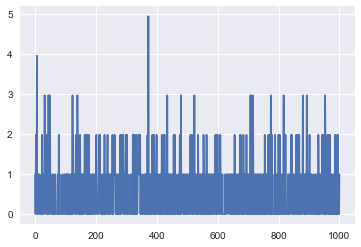

In [5]:
## the plot of the value of knock-in call option in each simulation
plt.plot(np.linspace(0, k, k), val)

In [6]:
## the confidence level is 1-a, get the confidence interval of payoff
a = 0.05
Int_l = sample_mean - sample_variance/ np.sqrt(k) * ss.norm.cdf(a/2)
Int_r = sample_mean + sample_variance/ np.sqrt(k) * ss.norm.cdf(a/2)
print(f"The confidence interval of payoff with confidence level equal to 95% is:\n [{Int_l}, {Int_r}]")

The confidence interval of payoff with confidence level equal to 95% is:
 [0.5609603571717193, 0.5787044245982197]


Question 2

In [7]:
b = - np.log(H/s0)
c = np.log(K/s0)
print(f" The parameter b is equal to {b}")
print(f" The parameter c is equal to {c}")

 The parameter b is equal to 0.11122563511022437
 The parameter c is equal to 0.010471299867295437


In [8]:
r_1 = 0.06
r_2 = 0.06
theta_1 = - (r_1 + r)/sigma
theta_2 =  (r_2 - r) /sigma

h = int(m/2)

In [9]:
r = .05
sigma = 0.15
s0 = 95
T = 0.25
H = 85
K = 96
k = 1000
n = 1000
m = 50
dt = T/m
val = np.zeros(k)
payoff = np.zeros(n)
for i in np.arange(k):
    for j in np.arange(n):
        dW = np.sqrt(dt)*norm.rvs(size = m)
        W_t = dW.cumsum()      ## the path of Brownian Motion
        dL1_t = (- r_1 - 0.5 * sigma**2) *dt + sigma * dW[0:h]   ## the scatter of Lt in the first stage
        dL2_t = (r_2 - 0.5 *sigma**2)*dt + sigma* dW[h:(m+1)]       ## the scatter of Lt in the second stage
        L = np.append(dL1_t , dL2_t).cumsum()     ## the path of Lt
        gamma1 = theta_1 * dL1_t.cumsum()[-1] + theta_2 * dL2_t.cumsum()[-1] - (theta_1**2 + theta_2**2)/T/4
        gamma = np.exp(gamma1)
        payoff[j] = 1000*float(L[-1]>c)*float(L.min()<-b) * gamma 
    val[i] = payoff.mean()*np.exp(-r*T)
    
print('MC computation for down_in_digital_call value: \n')
print('Mean is ' + str(val.mean()))    
print('MSE is ' + str(val.var()))

sample_mean = val.mean()
sample_variance = val.var()

MC computation for down_in_digital_call value: 

Mean is 0.5249732127375227
MSE is 0.36877789449066734


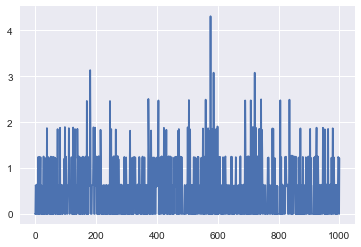

In [10]:
plt.plot(np.linspace(0, k, k), val)

In [11]:
## the confidence interval
a = 0.05
Int_l = sample_mean - sample_variance/ np.sqrt(k) * ss.norm.cdf(a/2)
Int_r = sample_mean + sample_variance/ np.sqrt(k) * ss.norm.cdf(a/2)
print(f"The confidence interval of payoff with confidence level equal to 95% is:\n [{Int_l}, {Int_r}]")

The confidence interval of payoff with confidence level equal to 95% is:
 [0.5190260249280206, 0.5309204005470248]


Question 3

In [12]:
r_list = np.linspace(0.03, 0.07, 5)
l = 5
val = np.zeros(k)
payoff = np.zeros(n)
sample_variance = np.zeros(l)
sample_mean = np.zeros(l)

for s in np.arange(l):
    for i in np.arange(k):
        for j in np.arange(n):
            dW = np.sqrt(dt)*norm.rvs(size = m)
            W_t = dW.cumsum()      ## the path of Brownian Motion
            dL1_t = (- r_list[s] - 0.5 * sigma**2) *dt + sigma * dW[0:h]   ## the scatter of Lt in the first stage
            dL2_t = (r_list[s] - 0.5 *sigma**2)*dt + sigma* dW[h:(m+1)]       ## the scatter of Lt in the second stage
            L = np.append(dL1_t , dL2_t).cumsum()     ## the path of Lt
            theta_1 = - (r_list[s] + r)/sigma
            theta_2 =  (r_list[s] - r) /sigma
            gamma1 = theta_1 * dL1_t.cumsum()[-1] + theta_2 * dL2_t.cumsum()[-1] - (theta_1**2 + theta_2**2)/T/4
            gamma = np.exp(gamma1)
            payoff[j] = 1000*float(L[-1]>c)*float(L.min()<-b) * gamma 
        val[i] = payoff.mean()*np.exp(-r*T)
    sample_mean[s] = val.mean()
    sample_variance[s] = val.var()

print(sample_mean)
print(sample_variance)

[0.49518502 0.5119269  0.52221545 0.52986411 0.56765648]
[0.36998828 0.38018622 0.32946746 0.33276198 0.32219413]
